<a href="https://colab.research.google.com/github/Taniya-roy20/spotify-minor-project/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORTING LIBRARIES**

In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


**2. Upload and Load Dataset**


In [3]:
import pandas as pd
df = pd.read_csv("spotify dataset.csv")
df.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,14-06-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),13-12-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),05-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,19-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),05-03-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


**3. BASIC CHECKS**

In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [6]:
# removing rows with missing values
df = df.dropna()


**4. EXPLORATORY DATA ANALYSIS (EDA)**

**4.1 Distribution plots (audio features)**

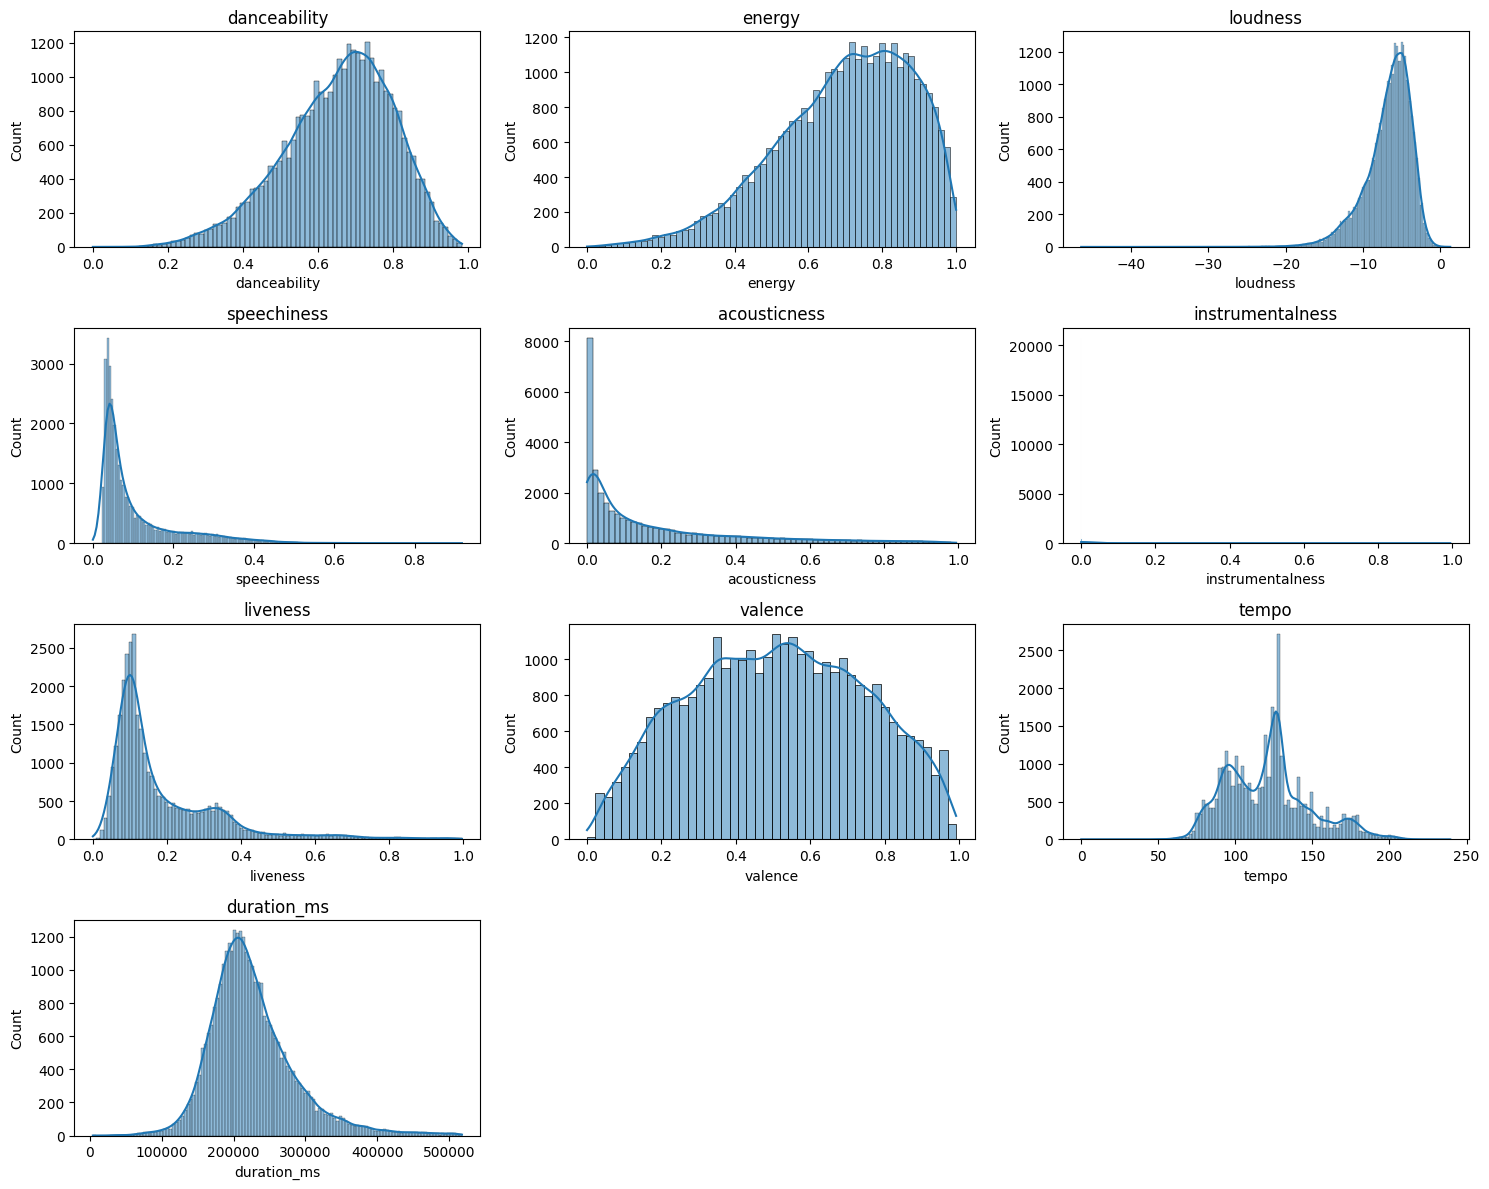

In [17]:
numeric_cols = ['danceability','energy','loudness','speechiness','acousticness',
                'instrumentalness','liveness','valence','tempo','duration_ms']

plt.figure(figsize=(15,12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()



**4.(ii). Playlist Genre Count Plot**

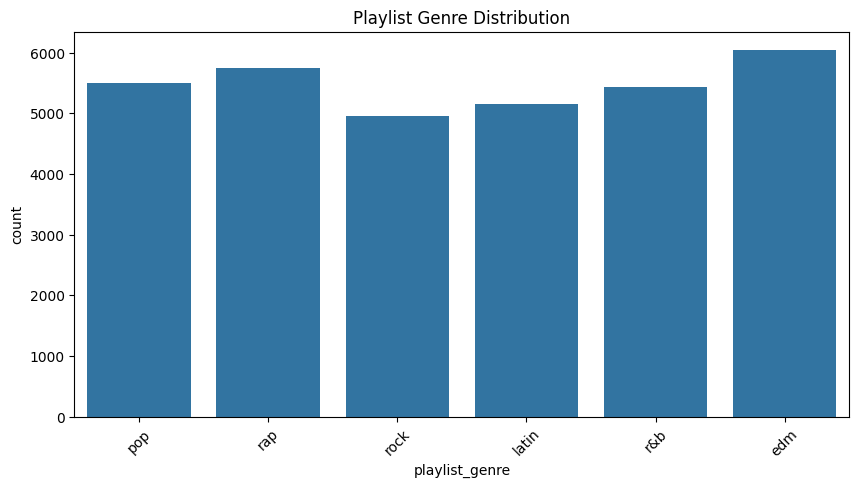

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="playlist_genre")
plt.xticks(rotation=45)
plt.title("Playlist Genre Distribution")
plt.show()



**5. Correlation Matrix**

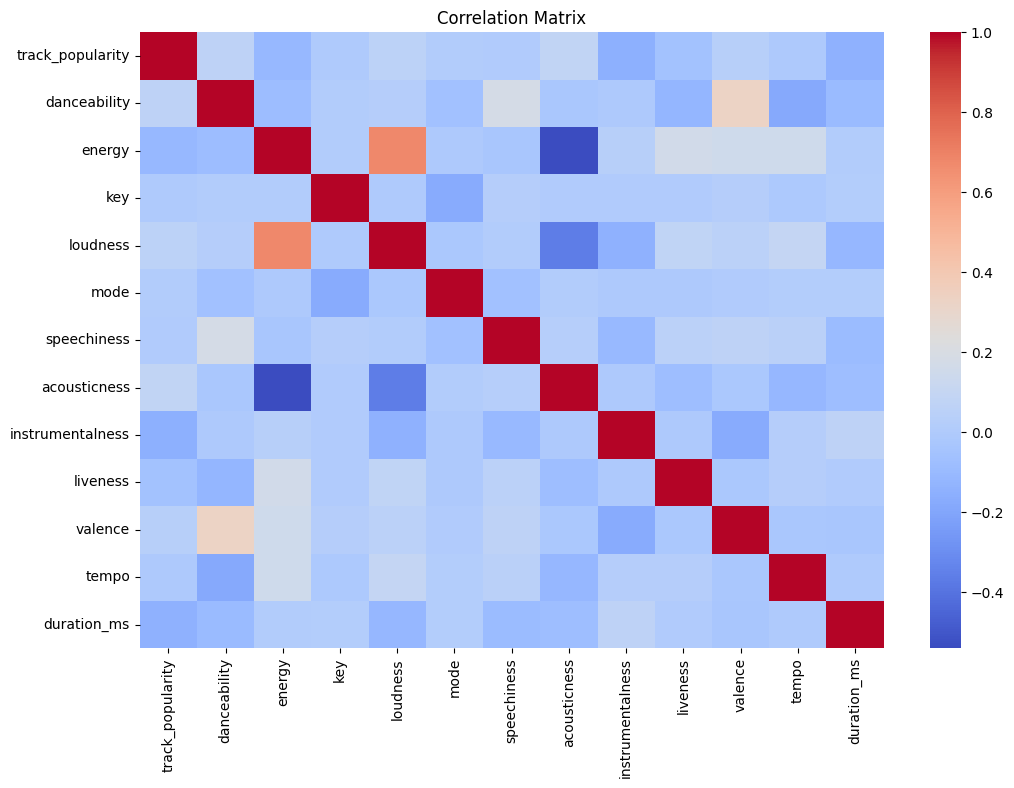

In [10]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



**6. Prepare Data for Clustering**

In [12]:
features = ["danceability","energy","loudness","speechiness","acousticness",
            "instrumentalness","liveness","valence","tempo"]

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**6.1 Silhouette Score**

In [20]:
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    print(f"K = {k}, Silhouette Score = {sil}")


K = 2, Silhouette Score = 0.1882420598705344
K = 3, Silhouette Score = 0.16598667028762307
K = 4, Silhouette Score = 0.18983488630540368
K = 5, Silhouette Score = 0.15530199887106355
K = 6, Silhouette Score = 0.14723916055918734
K = 7, Silhouette Score = 0.15160062711172367
K = 8, Silhouette Score = 0.14217956542615623
K = 9, Silhouette Score = 0.1400650094256843
K = 10, Silhouette Score = 0.13689927707105254


**7. K-Means Clustering (Simple)**

In [13]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

df["cluster"] = kmeans.labels_
df[["track_name","cluster"]].head()


,track_name,cluster
0,I Don't Care (with Justin Bieber) - Loud Luxur...,1
1,Memories - Dillon Francis Remix,1
2,All the Time - Don Diablo Remix,1
3,Call You Mine - Keanu Silva Remix,3
4,Someone You Loved - Future Humans Remix,1


**8. PCA VISUALIZATION (2D Cluster Plot)**

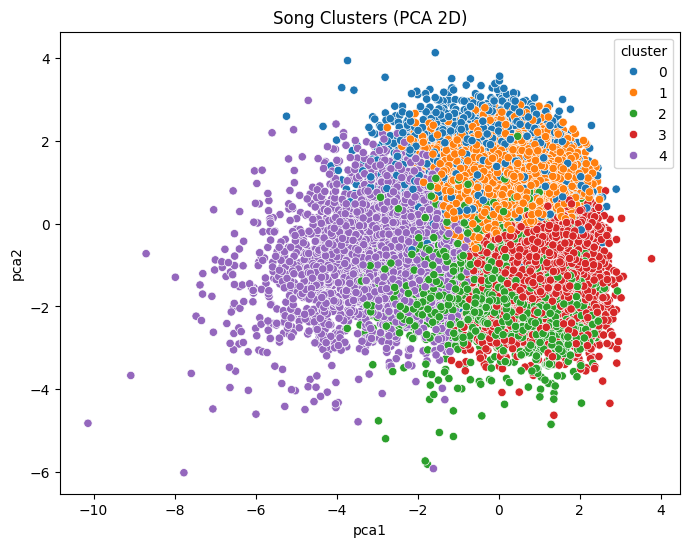

In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df["pca1"] = pca_result[:,0]
df["pca2"] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="cluster", palette="tab10")
plt.title("Song Clusters (PCA 2D)")
plt.show()


**9. Simple Cluster Plot Using Just Two Features**

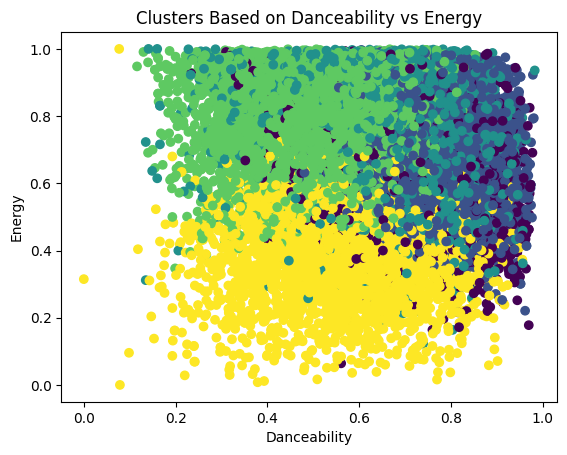

In [14]:
plt.scatter(df["danceability"], df["energy"], c=df["cluster"])
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Clusters Based on Danceability vs Energy")
plt.show()


**10. BUILDING A SIMPLE RECOMMENDATION SYSTEM**

In [22]:
def recommend(song_name, n=5):
    if song_name not in df['track_name'].values:
        return "Song not found!"

    song_cluster = df[df['track_name'] == song_name]['cluster'].values[0]
    recommendations = df[df['cluster'] == song_cluster].sample(n)
    return recommendations[['track_name','artist_name','playlist_genre']]



In [23]:
recommend("Heat Waves")


'Song not found!'